## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.209175 -0.224423  1.227223 -1.329158  0.864436 -0.883488
1 -0.218252  0.919442  0.626753 -0.512817 -0.227734  0.251667
2 -1.519902 -0.294104 -1.930236 -1.668855  1.100487 -0.889555
3  0.855487  0.774575 -1.279062 -1.920938 -1.488447 -0.658026
4  0.428821 -1.714492  0.495122  1.372504  0.549646 -0.322112


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9518694	total: 56.6ms	remaining: 56.6s
1:	learn: 0.9433806	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9356554	total: 57.6ms	remaining: 19.1s
3:	learn: 0.9258238	total: 58.1ms	remaining: 14.5s
4:	learn: 0.9187655	total: 58.6ms	remaining: 11.7s
5:	learn: 0.9099962	total: 59.3ms	remaining: 9.82s
6:	learn: 0.9020202	total: 59.7ms	remaining: 8.47s
7:	learn: 0.8932143	total: 60.4ms	remaining: 7.49s
8:	learn: 0.8855171	total: 60.8ms	remaining: 6.7s
9:	learn: 0.8771999	total: 61.3ms	remaining: 6.07s
10:	learn: 0.8694114	total: 61.8ms	remaining: 5.56s
11:	learn: 0.8602226	total: 62.4ms	remaining: 5.13s
12:	learn: 0.8515503	total: 62.9ms	remaining: 4.78s
13:	learn: 0.8440039	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8377944	total: 64ms	remaining: 4.2s
15:	learn: 0.8303515	total: 64.5ms	remaining: 3.96s
16:	learn: 0.8222315	total: 65.1ms	remaining: 3.77s
17:	learn: 0.8160544	total: 65.5ms	remaining: 3.57s
18:	learn: 0.8096285	total: 65.9ms	remaining: 3.

102:	learn: 0.4163338	total: 107ms	remaining: 933ms
103:	learn: 0.4134427	total: 108ms	remaining: 928ms
104:	learn: 0.4102877	total: 108ms	remaining: 923ms
105:	learn: 0.4072362	total: 109ms	remaining: 917ms
106:	learn: 0.4038354	total: 109ms	remaining: 911ms
107:	learn: 0.4006920	total: 110ms	remaining: 907ms
108:	learn: 0.3980427	total: 110ms	remaining: 901ms
109:	learn: 0.3955085	total: 111ms	remaining: 896ms
110:	learn: 0.3922696	total: 111ms	remaining: 890ms
111:	learn: 0.3900732	total: 112ms	remaining: 884ms
112:	learn: 0.3878936	total: 112ms	remaining: 878ms
113:	learn: 0.3849748	total: 112ms	remaining: 873ms
114:	learn: 0.3820918	total: 113ms	remaining: 868ms
115:	learn: 0.3796454	total: 113ms	remaining: 863ms
116:	learn: 0.3770126	total: 114ms	remaining: 858ms
117:	learn: 0.3743754	total: 114ms	remaining: 855ms
118:	learn: 0.3721822	total: 115ms	remaining: 849ms
119:	learn: 0.3693778	total: 115ms	remaining: 845ms
120:	learn: 0.3675912	total: 116ms	remaining: 840ms
121:	learn: 

264:	learn: 0.1425915	total: 187ms	remaining: 518ms
265:	learn: 0.1417034	total: 187ms	remaining: 517ms
266:	learn: 0.1407646	total: 188ms	remaining: 515ms
267:	learn: 0.1398523	total: 188ms	remaining: 514ms
268:	learn: 0.1388260	total: 189ms	remaining: 513ms
269:	learn: 0.1379838	total: 189ms	remaining: 512ms
270:	learn: 0.1369063	total: 190ms	remaining: 511ms
271:	learn: 0.1359391	total: 190ms	remaining: 509ms
272:	learn: 0.1352101	total: 191ms	remaining: 508ms
273:	learn: 0.1341831	total: 191ms	remaining: 507ms
274:	learn: 0.1333795	total: 192ms	remaining: 506ms
275:	learn: 0.1326701	total: 192ms	remaining: 505ms
276:	learn: 0.1317583	total: 193ms	remaining: 504ms
277:	learn: 0.1310443	total: 193ms	remaining: 502ms
278:	learn: 0.1301988	total: 194ms	remaining: 501ms
279:	learn: 0.1292829	total: 195ms	remaining: 500ms
280:	learn: 0.1286445	total: 195ms	remaining: 499ms
281:	learn: 0.1278707	total: 195ms	remaining: 498ms
282:	learn: 0.1269858	total: 196ms	remaining: 497ms
283:	learn: 

441:	learn: 0.0501945	total: 274ms	remaining: 346ms
442:	learn: 0.0499470	total: 275ms	remaining: 345ms
443:	learn: 0.0497026	total: 275ms	remaining: 345ms
444:	learn: 0.0494557	total: 276ms	remaining: 344ms
445:	learn: 0.0491258	total: 276ms	remaining: 343ms
446:	learn: 0.0489738	total: 277ms	remaining: 343ms
447:	learn: 0.0487360	total: 277ms	remaining: 342ms
448:	learn: 0.0484196	total: 278ms	remaining: 341ms
449:	learn: 0.0481863	total: 278ms	remaining: 340ms
450:	learn: 0.0478706	total: 279ms	remaining: 339ms
451:	learn: 0.0476019	total: 279ms	remaining: 339ms
452:	learn: 0.0472942	total: 280ms	remaining: 338ms
453:	learn: 0.0469927	total: 280ms	remaining: 337ms
454:	learn: 0.0467275	total: 281ms	remaining: 336ms
455:	learn: 0.0464517	total: 281ms	remaining: 336ms
456:	learn: 0.0461644	total: 282ms	remaining: 335ms
457:	learn: 0.0458831	total: 282ms	remaining: 334ms
458:	learn: 0.0457436	total: 283ms	remaining: 333ms
459:	learn: 0.0455246	total: 283ms	remaining: 333ms
460:	learn: 

599:	learn: 0.0239558	total: 354ms	remaining: 236ms
600:	learn: 0.0237909	total: 355ms	remaining: 236ms
601:	learn: 0.0236673	total: 356ms	remaining: 235ms
602:	learn: 0.0235065	total: 356ms	remaining: 234ms
603:	learn: 0.0233890	total: 357ms	remaining: 234ms
604:	learn: 0.0232492	total: 357ms	remaining: 233ms
605:	learn: 0.0231363	total: 357ms	remaining: 232ms
606:	learn: 0.0230869	total: 358ms	remaining: 232ms
607:	learn: 0.0229969	total: 358ms	remaining: 231ms
608:	learn: 0.0228907	total: 359ms	remaining: 230ms
609:	learn: 0.0228358	total: 359ms	remaining: 230ms
610:	learn: 0.0227316	total: 360ms	remaining: 229ms
611:	learn: 0.0226206	total: 360ms	remaining: 228ms
612:	learn: 0.0225670	total: 361ms	remaining: 228ms
613:	learn: 0.0224578	total: 361ms	remaining: 227ms
614:	learn: 0.0223590	total: 362ms	remaining: 226ms
615:	learn: 0.0222243	total: 362ms	remaining: 226ms
616:	learn: 0.0221794	total: 363ms	remaining: 226ms
617:	learn: 0.0220659	total: 364ms	remaining: 225ms
618:	learn: 

803:	learn: 0.0115512	total: 458ms	remaining: 112ms
804:	learn: 0.0115396	total: 459ms	remaining: 111ms
805:	learn: 0.0115226	total: 460ms	remaining: 111ms
806:	learn: 0.0114796	total: 460ms	remaining: 110ms
807:	learn: 0.0114702	total: 461ms	remaining: 109ms
808:	learn: 0.0114316	total: 461ms	remaining: 109ms
809:	learn: 0.0114224	total: 462ms	remaining: 108ms
810:	learn: 0.0114106	total: 462ms	remaining: 108ms
811:	learn: 0.0113598	total: 462ms	remaining: 107ms
812:	learn: 0.0113508	total: 463ms	remaining: 106ms
813:	learn: 0.0113132	total: 464ms	remaining: 106ms
814:	learn: 0.0112602	total: 464ms	remaining: 105ms
815:	learn: 0.0112514	total: 465ms	remaining: 105ms
816:	learn: 0.0112221	total: 465ms	remaining: 104ms
817:	learn: 0.0111706	total: 466ms	remaining: 104ms
818:	learn: 0.0111636	total: 466ms	remaining: 103ms
819:	learn: 0.0111351	total: 467ms	remaining: 102ms
820:	learn: 0.0110852	total: 467ms	remaining: 102ms
821:	learn: 0.0110783	total: 468ms	remaining: 101ms
822:	learn: 

959:	learn: 0.0072244	total: 539ms	remaining: 22.4ms
960:	learn: 0.0072013	total: 539ms	remaining: 21.9ms
961:	learn: 0.0071651	total: 540ms	remaining: 21.3ms
962:	learn: 0.0071561	total: 540ms	remaining: 20.7ms
963:	learn: 0.0071495	total: 541ms	remaining: 20.2ms
964:	learn: 0.0071406	total: 541ms	remaining: 19.6ms
965:	learn: 0.0071256	total: 541ms	remaining: 19.1ms
966:	learn: 0.0071010	total: 542ms	remaining: 18.5ms
967:	learn: 0.0070761	total: 543ms	remaining: 17.9ms
968:	learn: 0.0070644	total: 543ms	remaining: 17.4ms
969:	learn: 0.0070292	total: 544ms	remaining: 16.8ms
970:	learn: 0.0070146	total: 544ms	remaining: 16.3ms
971:	learn: 0.0069904	total: 545ms	remaining: 15.7ms
972:	learn: 0.0069817	total: 545ms	remaining: 15.1ms
973:	learn: 0.0069732	total: 546ms	remaining: 14.6ms
974:	learn: 0.0069647	total: 546ms	remaining: 14ms
975:	learn: 0.0069564	total: 547ms	remaining: 13.4ms
976:	learn: 0.0069423	total: 547ms	remaining: 12.9ms
977:	learn: 0.0069188	total: 548ms	remaining: 12

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

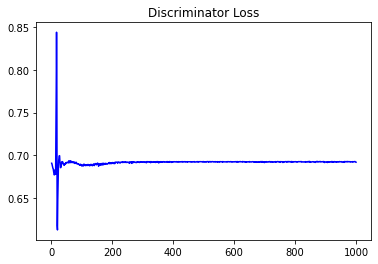

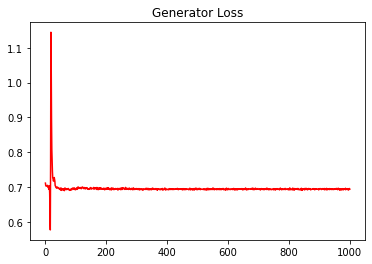

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08749401685740066


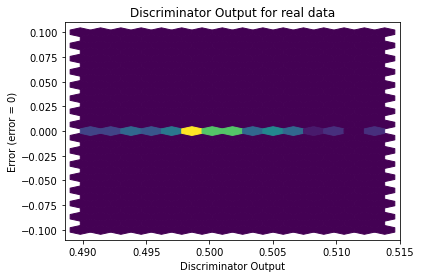

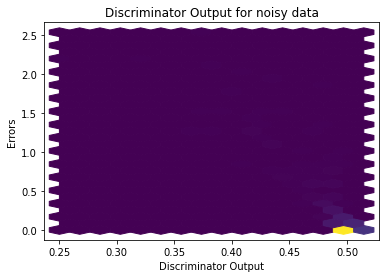

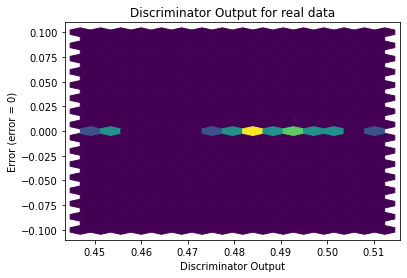

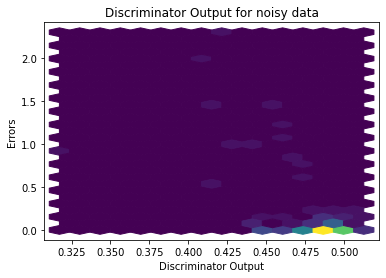

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


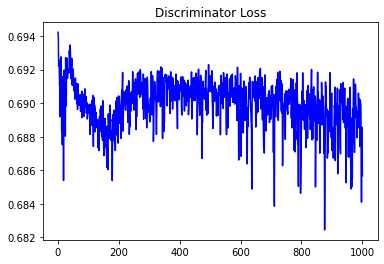

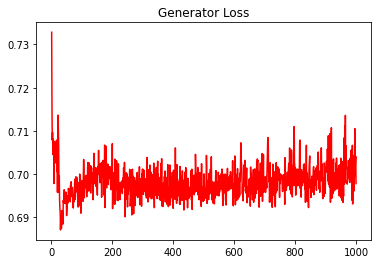

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05089771302195284


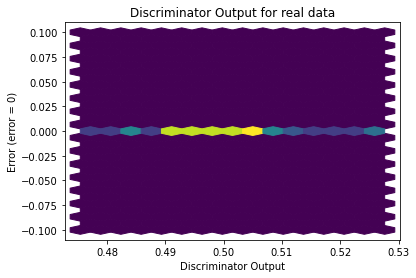

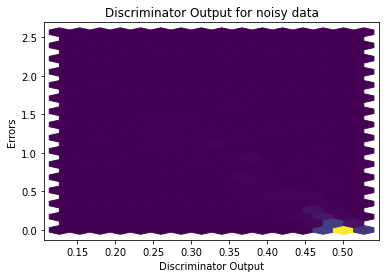

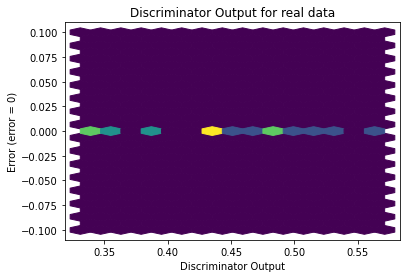

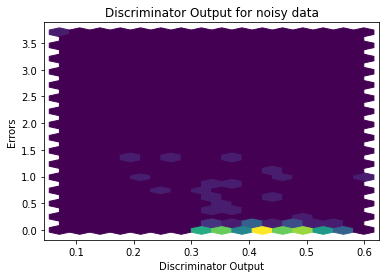

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1762]], requires_grad=True)
